In [34]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Xno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('../Data/tinder_google_play_reviews.csv')
df.head()

                               reviewId       userName  \
0  f251130c-d605-4664-ab9a-e8178a4b8513  A Google user   
1  6e8ec4bf-66f7-4447-8588-219f3c36d231  A Google user   
2  e1852ce7-b159-40b1-9877-58c1f3d43dbd  A Google user   
3  ce72669f-2f2f-4851-ae7d-7a40ca0a3693  A Google user   
4  a86ca0aa-7a2f-4e9e-8c7c-ca7ff6b0467e  A Google user   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0  Why did you do this to Whitney? Tinder owners ...      1              0   
1  Maybe 2 stars because why should you pay to se...      2              0   
2                                        excellent 👌      5              0   
3 

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659565 entries, 0 to 659564
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              659565 non-null  object
 1   userName              659565 non-null  object
 2   userImage             659565 non-null  object
 3   content               658209 non-null  object
 4   score                 659565 non-null  int64 
 5   thumbsUpCount         659565 non-null  int64 
 6   reviewCreatedVersion  524994 non-null  object
 7   at                    659565 non-null  object
 8   replyContent          58882 non-null   object
 9   repliedAt             58882 non-null   object
 10  appVersion            524994 non-null  object
dtypes: int64(2), object(9)
memory usage: 55.4+ MB
None


In [15]:
df.columns    # Nomes das colunas


Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')

In [16]:
df.shape


(658209, 11)

In [ ]:
df.describe()

               score  thumbsUpCount
count  659565.000000  659565.000000
mean        2.858746       1.927569
std         1.773337      33.078299
min         1.000000       0.000000
25%         1.000000       0.000000
50%         3.000000       0.000000
75%         5.000000       0.000000
max         5.000000    5449.000000


In [7]:
df.isnull().sum()


reviewId                     0
userName                     0
userImage                    0
content                   1356
score                        0
thumbsUpCount                0
reviewCreatedVersion    134571
at                           0
replyContent            600683
repliedAt               600683
appVersion              134571
dtype: int64

In [ ]:
(df.isnull().mean() * 100).round(2)


reviewId                 0.00
userName                 0.00
userImage                0.00
content                  0.00
score                    0.00
thumbsUpCount            0.00
reviewCreatedVersion    20.43
at                       0.00
replyContent            91.09
repliedAt               91.09
appVersion              20.43
dtype: float64

In [8]:
df = df.dropna(subset=['content'])


In [18]:
df = df.drop_duplicates()
print('Total de linhas após remoção de duplicatas:', df.shape[0])


Total de linhas após remoção de duplicatas: 658209


In [19]:
df['score'] = pd.to_numeric(df['score'], errors='coerce') 
df['content'] = df['content'].astype(str).str.lower().str.strip()


In [20]:
print(df['score'].describe())
print(df.describe())

count    658209.000000
mean          2.856126
std           1.773352
min           1.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           5.000000
Name: score, dtype: float64
               score  thumbsUpCount
count  658209.000000  658209.000000
mean        2.856126       1.931426
std         1.773352      33.112234
min         1.000000       0.000000
25%         1.000000       0.000000
50%         3.000000       0.000000
75%         5.000000       0.000000
max         5.000000    5449.000000


In [21]:
df = df.dropna(subset=['score'])
df['content'] = df['content'].fillna('sem review')

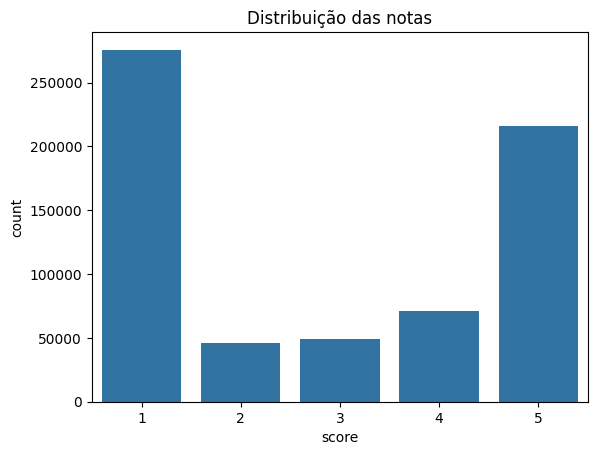

In [23]:
sns.countplot(x='score', data=df)
plt.title('Distribuição das notas')
plt.show()

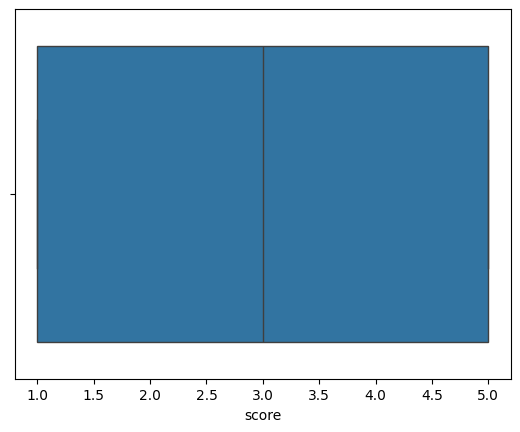

In [24]:
sns.boxplot(x='score', data=df)
plt.show()

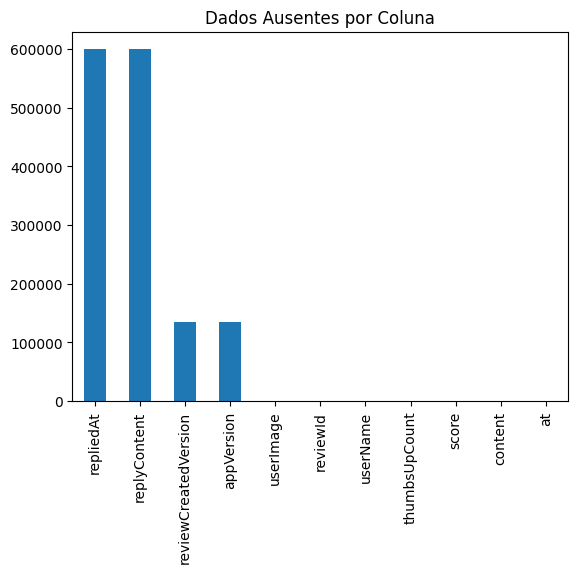

In [25]:
df.isnull().sum().sort_values(ascending=False).plot(kind='bar', title='Dados Ausentes por Coluna')
plt.show()

In [32]:
stop_words = set(stopwords.words('portuguese'))
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)      
    text = text.lower().strip()              
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    return ' '.join(tokens)
df['clean_content'] = df['content'].apply(clean_text)

In [33]:
all_words = " ".join(df['clean_content']).split()
mais_frequentes = Counter(all_words).most_common(20)
print("20 palavras mais frequentes nas avaliações:")
for palavra, freq in mais_frequentes:
    print(f"{palavra}: {freq}")

20 palavras mais frequentes nas avaliações:
i: 319112
to: 304607
the: 255157
and: 245367
app: 214407
it: 197437
you: 133432
of: 123051
is: 122477
my: 119268
this: 109466
not: 92758
in: 92733
its: 83361
but: 81780
on: 76520
good: 75206
have: 74133
tinder: 70935
that: 67281


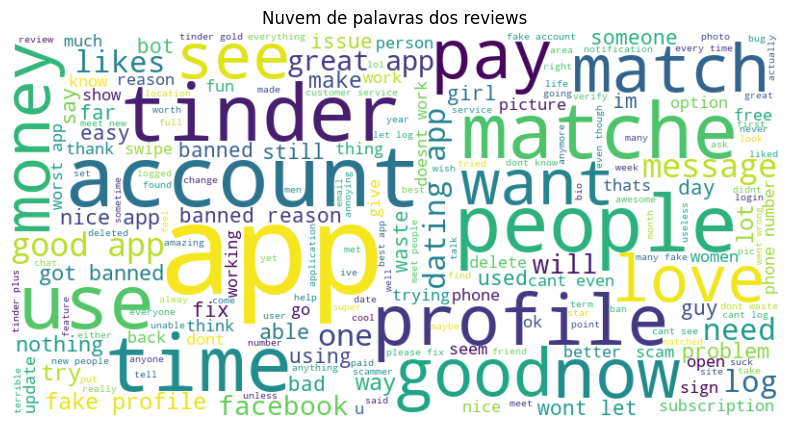

In [35]:
texto_completo = " ".join(df['clean_content'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(texto_completo)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de palavras dos reviews')
plt.show()

In [ ]:
df['sentimento'] = df['score'].apply(lambda x: 'positiva' if x >= 4 else ('negativa' if x <= 2 else 'neutra'))

freq_pos = Counter(" ".join(df[df['sentimento']=='positiva']['clean_content']).split()).most_common(10)
freq_neg = Counter(" ".join(df[df['sentimento']=='negativa']['clean_content']).split()).most_common(10)
print('Palavras positivas:', freq_pos)
print('Palavras negativas:', freq_neg)

Palavras positivas: [('app', 65988), ('to', 57488), ('good', 56882), ('i', 52990), ('it', 45164), ('the', 43152), ('and', 36430), ('its', 31371), ('great', 28363), ('nice', 26821)]
Palavras negativas: [('i', 239213), ('to', 219828), ('and', 190387), ('the', 186927), ('app', 134872), ('it', 132862), ('you', 101457), ('my', 95377), ('of', 92442), ('is', 88371)]


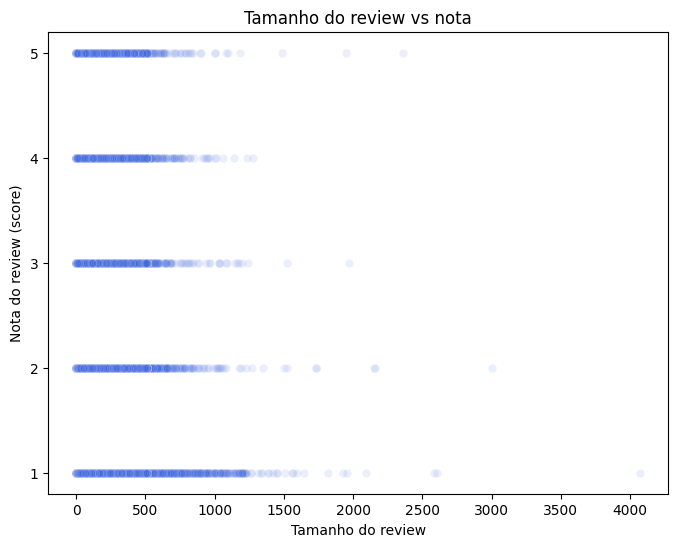

In [52]:
df['review_len'] = df['content'].apply(len)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='review_len', y='score', alpha=0.1, color='royalblue')
plt.xlabel('Tamanho do review')
plt.ylabel('Nota do review (score)')
plt.title('Tamanho do review vs nota')
plt.yticks([1, 2, 3, 4, 5])  
plt.show()


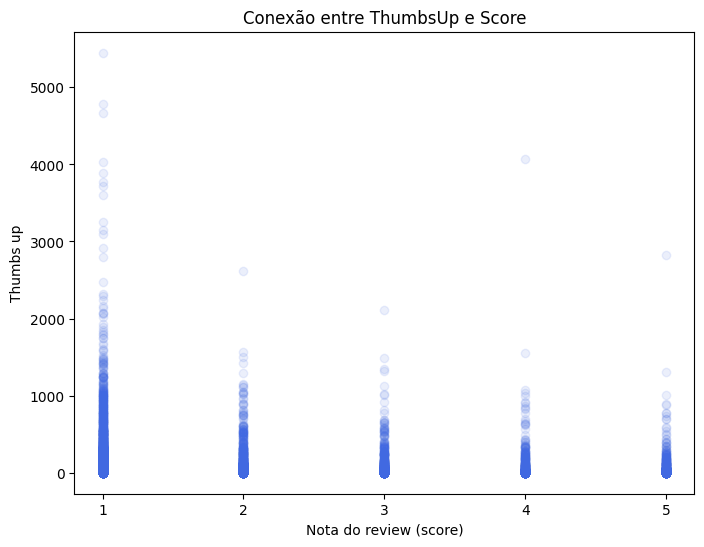

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(df['score'], df['thumbsUpCount'], alpha=0.1, color='royalblue')
plt.xlabel('Nota do review (score)')
plt.ylabel('Thumbs up')
plt.title('Conexão entre ThumbsUp e Score')
plt.xticks([1, 2, 3, 4, 5]) 
plt.show()


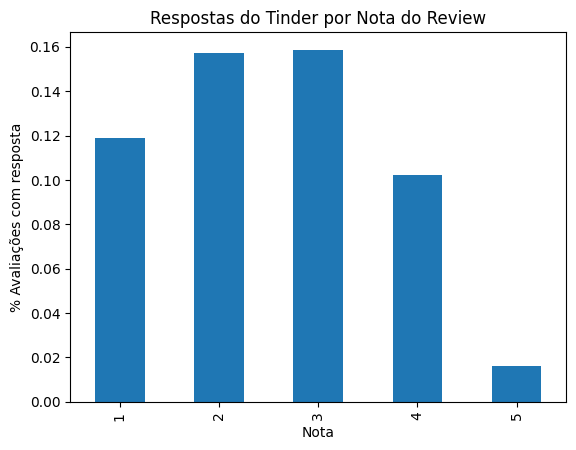

In [41]:
df['tem_resposta'] = df['replyContent'].notnull()
respostas_por_nota = df.groupby('score')['tem_resposta'].mean()
respostas_por_nota.plot(kind='bar', ylabel='% Avaliações com resposta', xlabel='Nota')
plt.title('Respostas do Tinder por Nota do Review')
plt.show()